In [1]:
import os
import io
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)

            inBody = False
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message


def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)

    return DataFrame(rows, index=index)

data = DataFrame({'message': [], 'class': []})

data = data.append(dataFrameFromDirectory('./emails/spam', 'spam'))
data = data.append(dataFrameFromDirectory('./emails/ham', 'ham'))
data.head()

,class,message
./emails/spam/00156.0b541afe96820e3bb8f900b565608269,spam,"<html>\n\n\n\n<head>\n\n<meta http-equiv=3D""Co..."
./emails/spam/00312.75c839d7d4f6da9e860a11b617904fb5,spam,"ilug ,\n\n\n\n From;Mr.Michael Kamah and Fami..."
./emails/spam/00001.7848dde101aa985090474a91ec93fcf0,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
./emails/spam/00002.d94f1b97e48ed3b553b3508d116e6a09,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
./emails/spam/00003.2ee33bc6eacdb11f38d052c44819ba6c,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...


In [2]:
y = data.iloc[:, 0].values

In [3]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data['message'].values)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(counts, y, test_size = 0.30, random_state = 0)

[ 0.91708246  0.92114941  0.90951458  0.90538836  0.95503906]


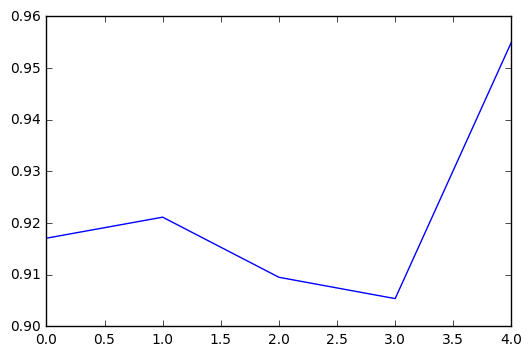

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
classifier = MultinomialNB()

classifier = classifier.fit(X_train , y_train)
scores = cross_val_score(classifier, X_train , y_train, cv=5 , scoring='f1_macro')
print scores
plt.plot(scores)
plt.show()


In [6]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[752,   2],
       [ 28, 118]])

In [7]:
scores.mean()

0.92163477184523379

In [8]:
examples = ['Free Viagra now!!!', "Hi Bob, how about a game of golf tomorrow?"]
example_counts = vectorizer.transform(examples)


In [9]:
y_pred = classifier.predict(example_counts)
y_pred

array(['spam', 'ham'],
      dtype='|S4')